memanggil package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mengambil dataset

In [2]:
adv = pd.read_csv('data/Advertising.csv')
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


menghapus kolom unnamed

In [3]:
adv_1 = adv.drop(['Unnamed: 0'], axis=1)
adv_1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
adv_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


menampilkan grafik 

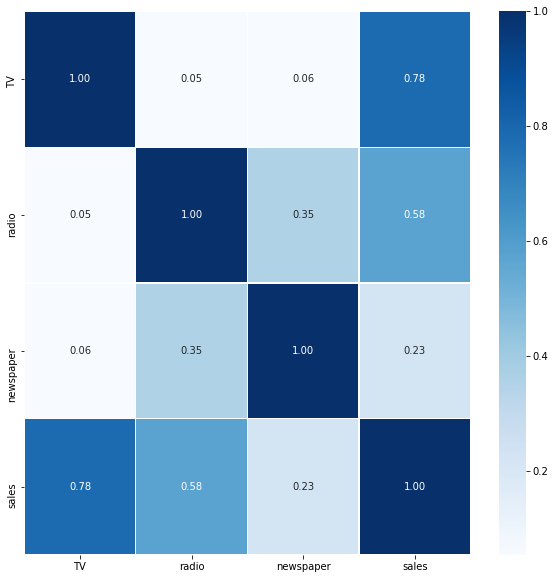

In [5]:
plt.figure(figsize=(10,10))  # to get size of your plot, you can change with any numbers
sns.heatmap(adv_1.corr(), # data to be shown in the plot
            annot=True, # do you want to get value instead of just color?
            linewidths=.10, # line between each box
            fmt= '.2f', # how many 0 behind coma (f for decimal)
            cmap='Blues'); # color map

cari yang berkolerasi paling dekat <br>
frekuensi penjualan (sales) berdasarkan penayangan iklan di TV

SINGLE LINEAR REGRESSION

memecah data training dan testing

In [6]:
# import package buat linear regresi
from sklearn.linear_model import LinearRegression 

# import package buat nge split data
from sklearn.model_selection import train_test_split

# target (X)
X = adv_1[['TV']]

# feature (Y)
y = adv_1['sales']

# train test split dipake
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

# cari tau shape nya
# training data
print("Training Data :",X_train.shape)
# testing data
print("Testing Data :",X_test.shape)

Training Data : (160, 1)
Testing Data : (40, 1)


fitting model

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

akurasi model training

In [8]:
print("Akurasi Data Training :",lr.score(X_train, y_train))

Akurasi Data Training : 0.6349443358013067


predict data testing

In [9]:
pred = lr.predict(X_test)
pred

array([15.36342374,  8.11204672, 16.70319266, 17.10903507, 19.65655188,
       11.5690417 , 15.17761638, 10.53732184, 14.20946219,  8.02892237,
        8.60590315,  8.98729722, 15.03581602, 19.78857291, 18.50259033,
        9.54960899, 15.39276175,  9.71585769, 17.40241513,  8.7330345 ,
       17.54910515,  7.75999065, 21.01587947, 14.12633785, 16.14577056,
       10.03368608, 18.44880399, 15.12383003, 13.78895078, 14.84511898,
       18.69328737, 18.05274091, 19.28982681, 14.12144818, 12.71811358,
       10.4835355 , 13.21197001, 20.70294074, 15.6421348 , 18.96710875])

cetak akurasinya

In [10]:
print("Akurasi Data Testing :", lr.score(X_test, y_test))

Akurasi Data Testing : 0.47929101876755154


memeriksa errornya dengan mean squared error

In [11]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error dari Data Testingnya :", mean_squared_error(y_test, pred))

Mean Squared Error dari Data Testingnya : 11.253298893473929


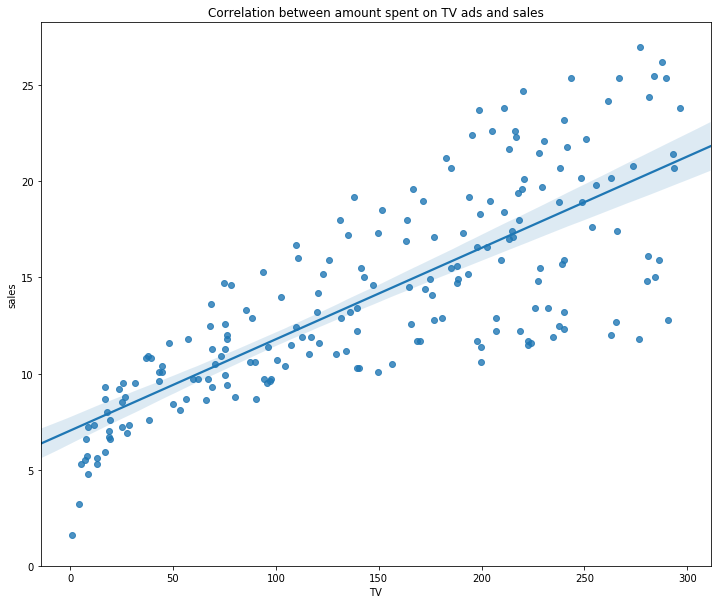

In [12]:
# lebar
width = 12
# tinggi
height = 10
# plot
plt.figure(figsize=(width, height))
# replot(<sumbu_x>, <sumbu_y>, <data_yang_ditampilkan>)
sns.regplot(x="TV", y="sales", data=adv_1)
plt.ylim(0,);
# judul
plt.title("Correlation between amount spent on TV ads and sales");

MULTIPLE LINEAR REGRESSION

selain penayangan iklan di TV (TV), penjualan dipengaruhi oleh penayangan iklan di radio (radio) <br>
namun pada koran (newspaper) tidak begitu berpengaruh karena dari penggunaan koran sendiri sudah berkurang

tentuin fitur(X) dan Target(y)

In [14]:
# fitur (X)
X = adv_1[['TV','newspaper']]
# target (y)
y = adv_1['sales']

pembagian data jadi training dan testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

# liat shapenya
# Data Training
print("Shape Data Training", X_train.shape)
# Data Testing
print("Shape Data Testing", X_test.shape)

Shape Data Training (160, 2)
Shape Data Testing (40, 2)


fitting data trainingnya

In [16]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Evaluasi dari Data Training

In [17]:
print("Evaluasi Data Training :", lr.score(X_train, y_train))

Evaluasi Data Training : 0.6651662406301084


buat prediksinya

In [18]:
pred = lr.predict(X_test)

Akurasi dari Data Testing

In [19]:
print("Akurasi dari Data Testing :", lr.score(X_test, y_test))

Akurasi dari Data Testing : 0.5337098363489415


Menghitung kesalahan dari Data Testing dengan Mean Squared Error

In [20]:
print("Mean Squared Error dari Data Testing :", mean_squared_error(y_test,pred))

Mean Squared Error dari Data Testing : 10.077226957431327
